In [2]:
import pandas as pd
import numpy as np

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baca data dari file CSV ke dalam DataFrame
df = pd.read_csv('CSV_Latihan_Python.csv')  # Gantikan 'nama_file.csv' dengan nama file Anda

# Inisialisasi kolom 'Result' dengan nilai 0
df['SV_Total'] = 0.0
df['Hydrostatic Pressure'] = 0.0

# Konversi gradien tekanan hidrostatik ke dalam unit yang sesuai
gradient_psi_per_ft = 0.44
gradient_psi_per_m = gradient_psi_per_ft * 3.28084  # Konversi ke psi/m


# Hitung hasil dengan formula yang diberikan dan tambahkan hasil pada baris sebelumnya
for i in range(1, len(df)):
    df.loc[i, 'SV_Total'] = df.loc[i-1, 'SV_Total'] + (df.loc[i, 'DEN'] * 9.81 * (df.loc[i, 'TVDSS'] - df.loc[i-1, 'TVDSS']) * 0.145)
    df.loc[i, 'Hydrostatic Pressure'] = gradient_psi_per_m * df.loc[i, 'TVDSS']

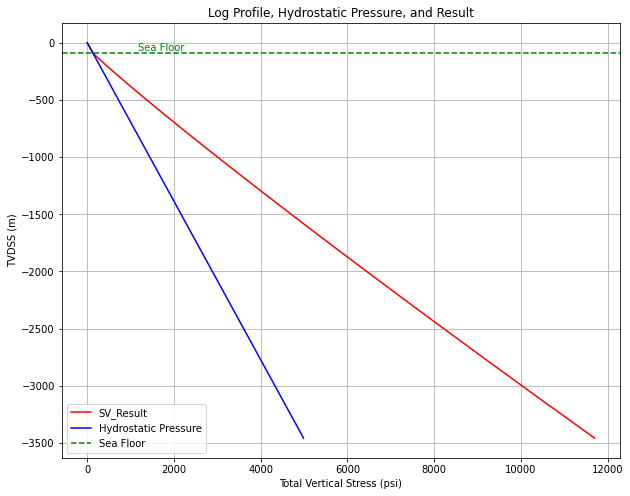

In [51]:
# Visualisasi log profile, tekanan hidrostatik, hasil perhitungan, dan garis "Sea Floor"
plt.figure(figsize=(10, 8))

# Plot log profile result SV perhitungan
plt.plot(df['SV_Total'], -df['TVDSS'], color='red', label='SV_Result')

# Plot profil tekanan hidrostatik
plt.plot(df['Hydrostatic Pressure'], -df['TVDSS'], color='blue', label='Hydrostatic Pressure')

# Garis "Sea Floor"
sea_floor_depth = 91  # Kedalaman TVDSS Sea Floor dalam meter
plt.axhline(y=-sea_floor_depth, color='green', linestyle='--', label='Sea Floor')
plt.text(df['SV_Total'].max() * 0.1, -sea_floor_depth + 25, 'Sea Floor', color='green')

plt.xlabel('Total Vertical Stress (psi)')
plt.ylabel('TVDSS (m)')
plt.title('Log Profile, Hydrostatic Pressure, and Result')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
df.head()

,TVDSS,SV,DEN,SV_1,SV_NEW,SV_Total,Hydrostatic Pressure
0,0.000000,0.000000,1.03,0.000000,0.000000,0.000000,0.000000
1,0.126302,0.185026,1.03,0.185048,0.184859,0.185048,0.182326
2,0.252604,0.370046,1.03,0.370096,0.369719,0.370096,0.364651
3,0.378906,0.555066,1.03,0.555144,0.554578,0.555144,0.546977
4,0.505209,0.740086,1.03,0.740194,0.739439,0.740194,0.729304
